<a href="https://colab.research.google.com/github/soffiyahabass1/Machine-learning-Projects/blob/main/Cancer_deathrate_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cancer = pd.read_csv("/content/drive/MyDrive/pcos/cancer_reg.csv")
cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
cancer.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [5]:
cancer.isnull().sum()

,0
avganncount,0
avgdeathsperyear,0
target_deathrate,0
incidencerate,0
medincome,0
popest2015,0
povertypercent,0
studypercap,0
binnedinc,0
medianage,0


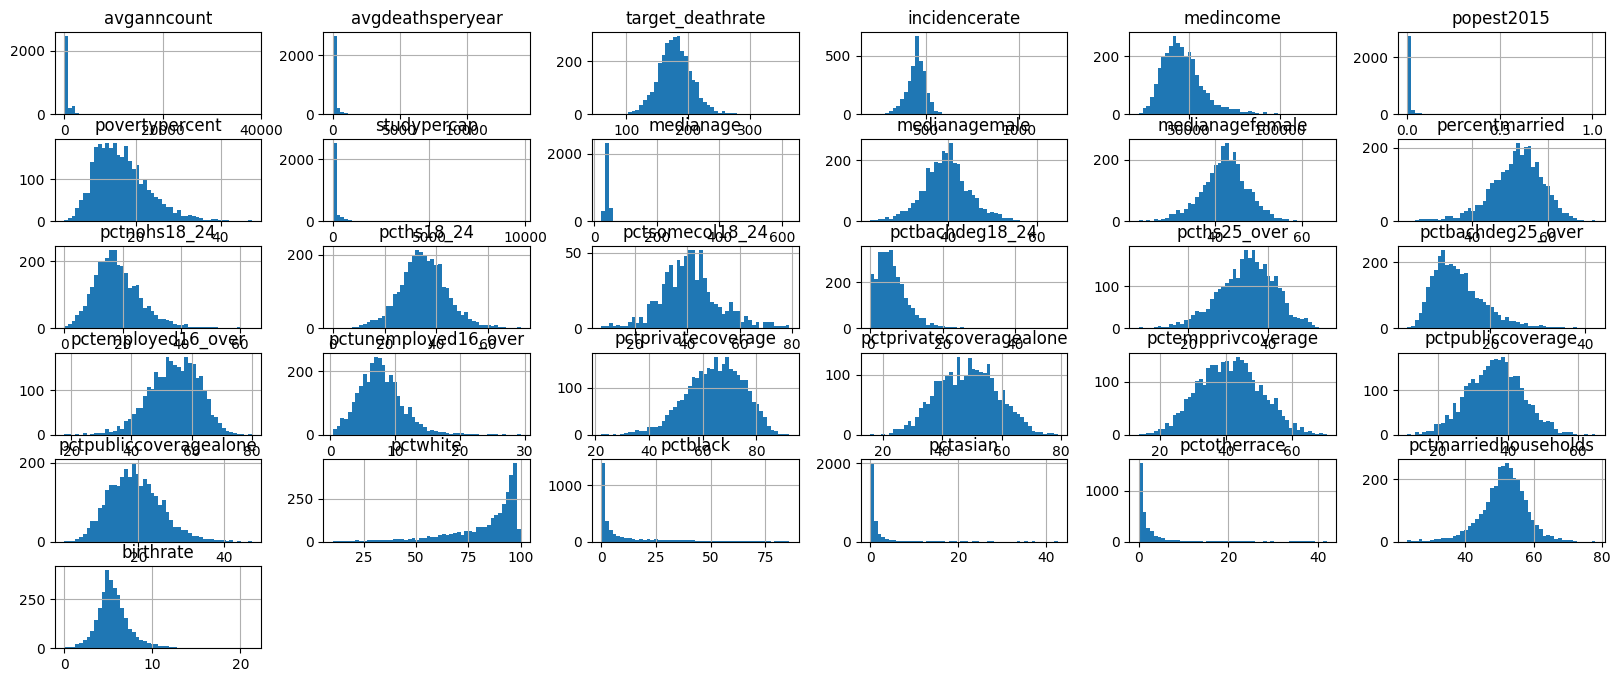

In [6]:
import matplotlib.pyplot as plt
cancer.hist(bins=50, figsize=(20, 8))
plt.show()

In [7]:
from sklearn.model_selection import ShuffleSplit
splitter = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(cancer, cancer["target_deathrate"]):
   strat_train_set_n = cancer.iloc[train_index]
   strat_test_set_n = cancer.iloc[test_index]
   strat_splits.append([strat_train_set_n, strat_test_set_n])

In [8]:
cancer_train = strat_train_set_n.copy()
cancer_test = strat_test_set_n.copy()

In [9]:
cancer_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2437 entries, 943 to 1927
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              2437 non-null   float64
 1   avgdeathsperyear         2437 non-null   int64  
 2   target_deathrate         2437 non-null   float64
 3   incidencerate            2437 non-null   float64
 4   medincome                2437 non-null   int64  
 5   popest2015               2437 non-null   int64  
 6   povertypercent           2437 non-null   float64
 7   studypercap              2437 non-null   float64
 8   binnedinc                2437 non-null   object 
 9   medianage                2437 non-null   float64
 10  medianagemale            2437 non-null   float64
 11  medianagefemale          2437 non-null   float64
 12  geography                2437 non-null   object 
 13  percentmarried           2437 non-null   float64
 14  pctnohs18_24             24

In [10]:



from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


In [11]:
cancer_num = cancer_train.select_dtypes(include=[np.number])

In [12]:
 imputer.fit(cancer_num)

SimpleImputer(strategy='median')

In [13]:
cancer_train = pd.DataFrame(imputer.transform(cancer_num),columns=cancer_num.columns, index=cancer_num.index)

In [14]:
cancer_train.isnull().sum()

,0
avganncount,0
avgdeathsperyear,0
target_deathrate,0
incidencerate,0
medincome,0
popest2015,0
povertypercent,0
studypercap,0
medianage,0
medianagemale,0


In [15]:
corr_matrix = cancer_train.corr()
corr_matrix["target_deathrate"].sort_values(ascending=False)

,target_deathrate
target_deathrate,1.000000
incidencerate,0.468969
pctpubliccoveragealone,0.453490
povertypercent,0.429707
pctpubliccoverage,0.414291
pcths25_over,0.408296
pctunemployed16_over,0.378956
pcths18_24,0.276196
pctblack,0.251460
pctnohs18_24,0.073014


In [16]:
 from sklearn.preprocessing import MinMaxScaler
 min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
 cancer_min_max_scaled = min_max_scaler.fit_transform(cancer_train)

In [17]:
import numpy as np


# Mask upper triangle and diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
filtered_corr = corr_matrix.mask(mask)

# Stack and sort
most_corr = filtered_corr.stack().sort_values(ascending=False)
print(most_corr.head())


popest2015            avgdeathsperyear    0.970641
medianagefemale       medianagemale       0.930654
avgdeathsperyear      avganncount         0.912040
popest2015            avganncount         0.895090
pctmarriedhouseholds  percentmarried      0.870391
dtype: float64


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features
features = cancer_train.select_dtypes(include=[np.number])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
principal_components = pca.fit_transform(scaled_features)

# Step 3: Wrap in a DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

print("Original shape:", cancer_train.shape)
print("PCA-reduced shape:", pca_df.shape)


Original shape: (2437, 31)
PCA-reduced shape: (2437, 18)


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the key columns for features (X) and the target variable (y)
X = cancer_train.drop(columns=['target_deathrate'])
y = cancer_train['target_deathrate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
final_mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print("RMSE:", np.sqrt(final_mse))

MAE: 13.65906282057766
MSE: 321.6092249179486
RMSE: 17.93346661741529
R2 Score: 0.4998952220483003
RMSE: 17.93346661741529


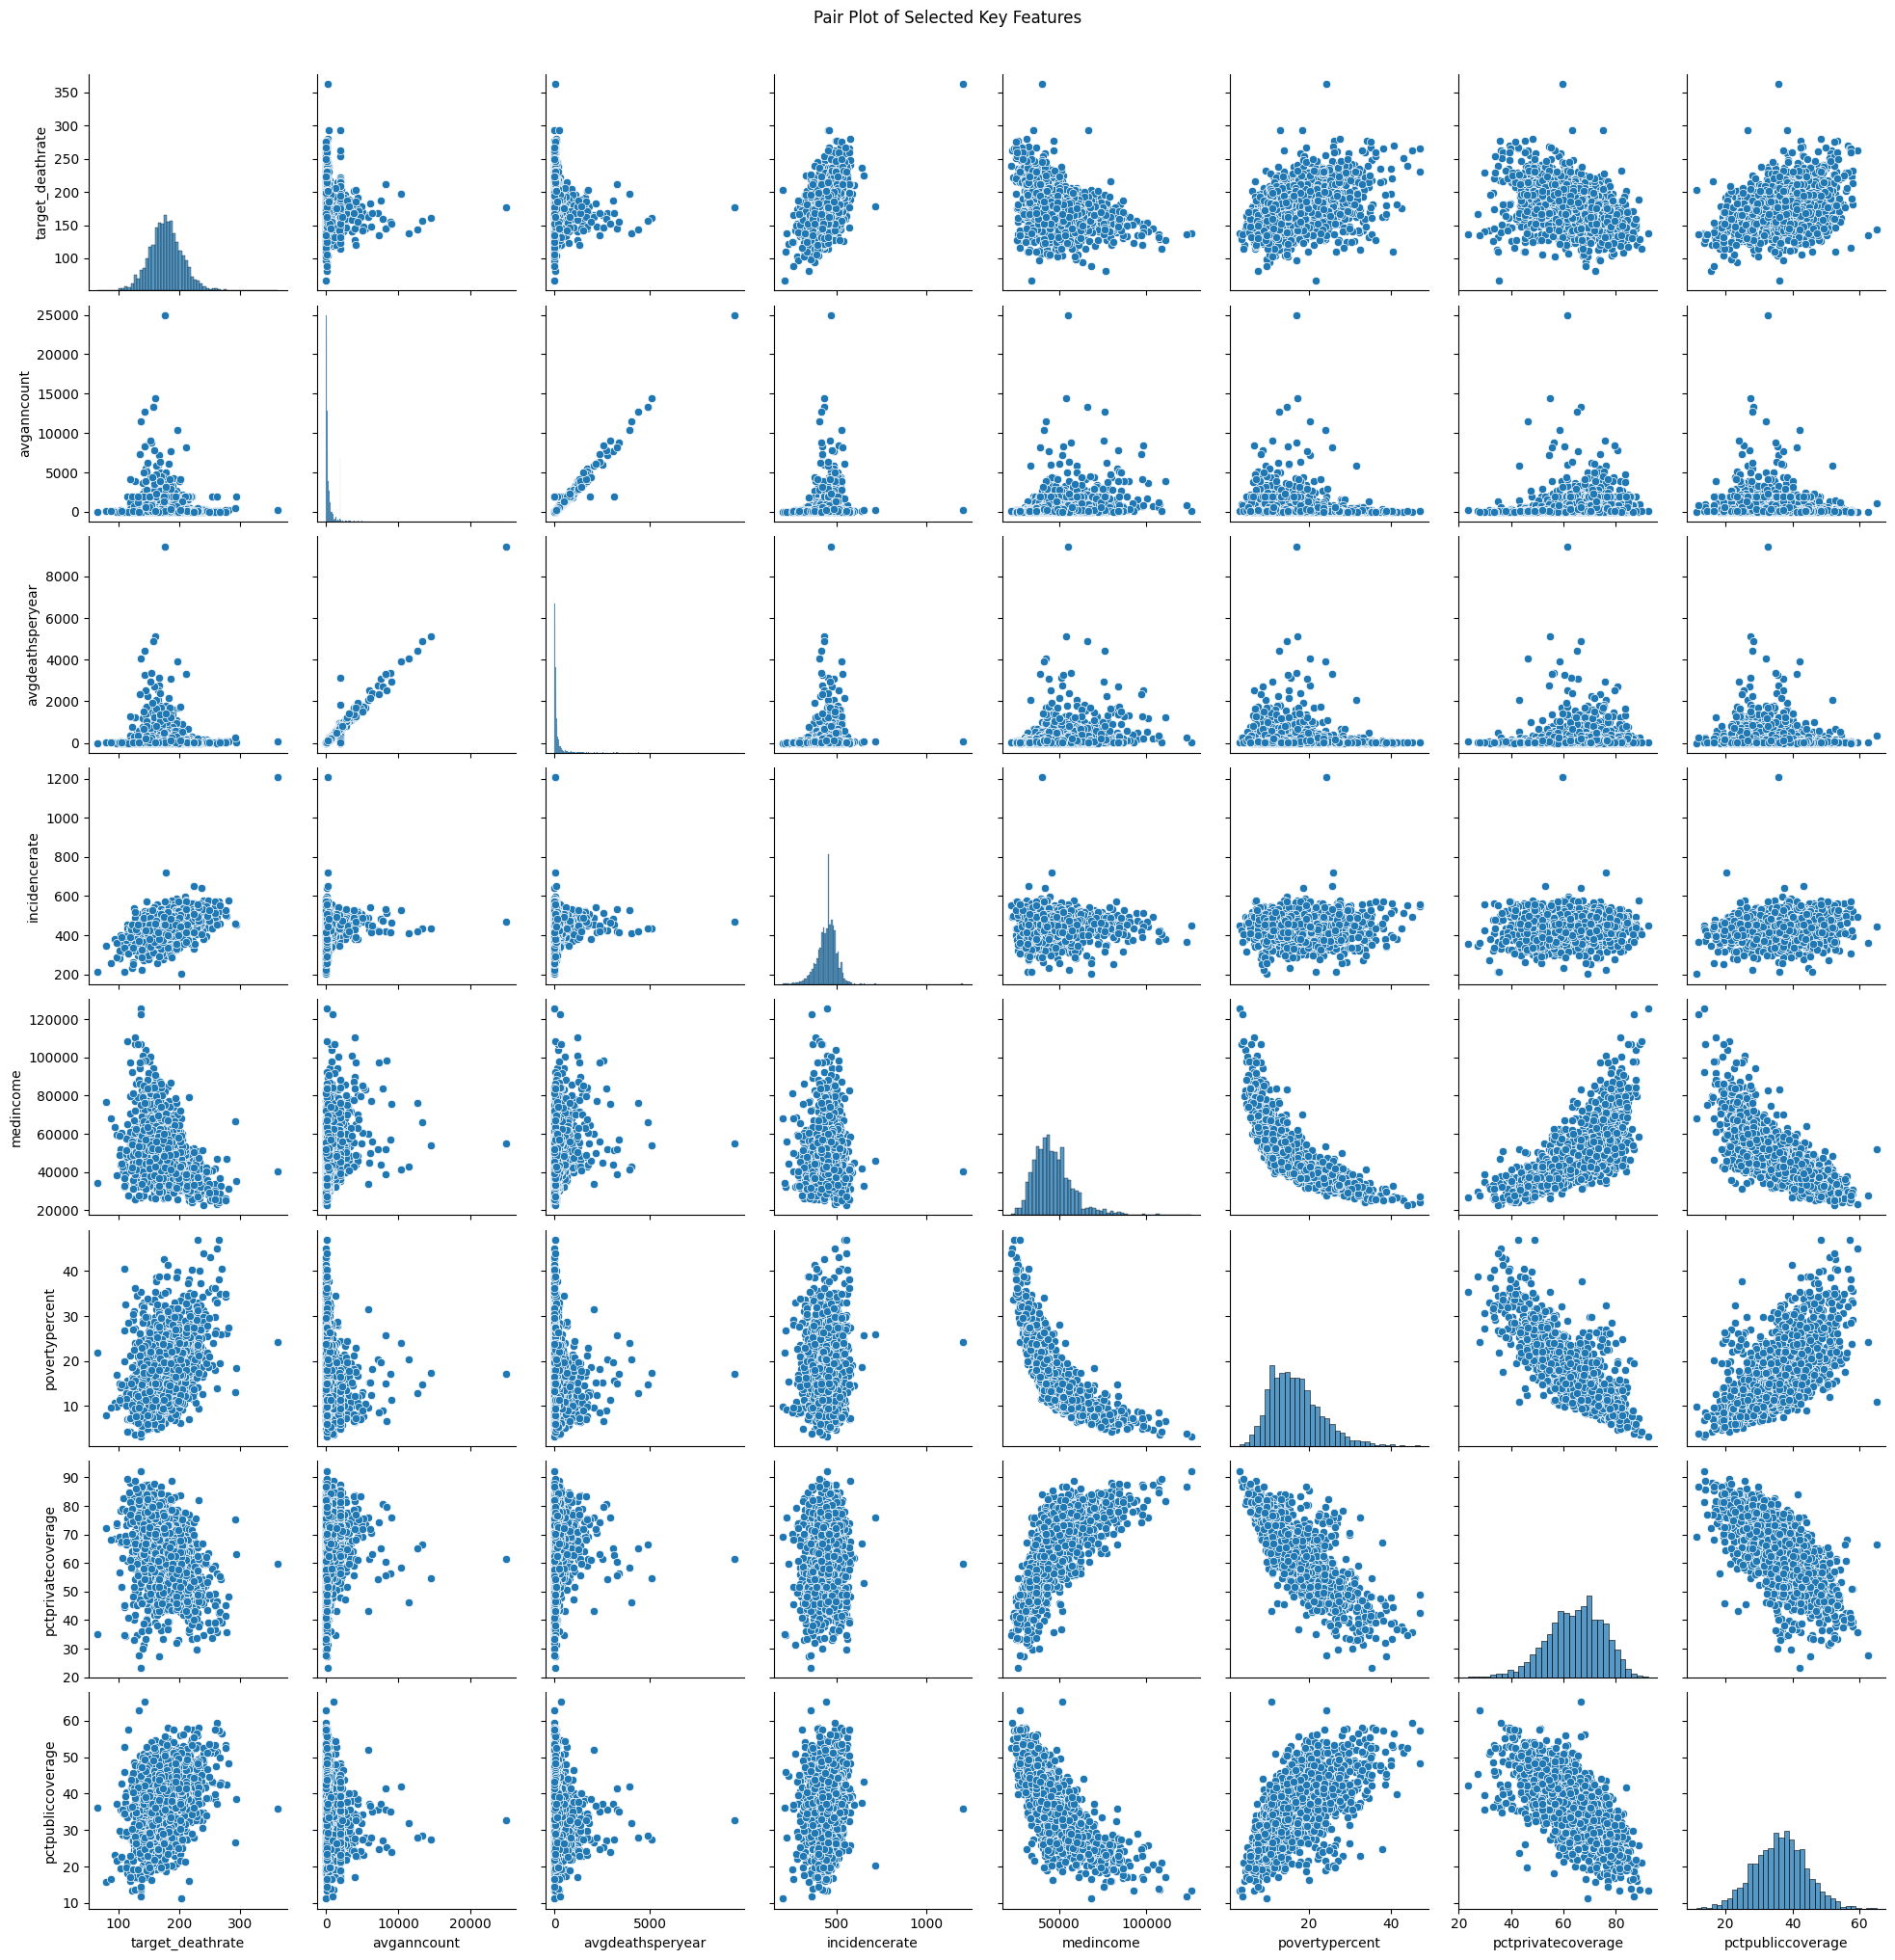

In [22]:
key_columns = [
    'target_deathrate', 'avganncount', 'avgdeathsperyear',
    'incidencerate', 'medincome', 'povertypercent',
    'pctprivatecoverage', 'pctpubliccoverage'
]

# Create the pair plot
sns.pairplot(cancer_train[key_columns])
plt.suptitle('Pair Plot of Selected Key Features', y=1.02)
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler\

# Apply Min-Max Scaling to the key columns
scaler = MinMaxScaler()
cancer_train[key_columns] = scaler.fit_transform(cancer_train[key_columns])

# Display the first few rows of the normalized data
cancer_train[key_columns].head()


,target_deathrate,avganncount,avgdeathsperyear,incidencerate,medincome,povertypercent,pctprivatecoverage,pctpubliccoverage
943,0.312648,0.029288,0.026372,0.260939,0.381261,0.178082,0.788099,0.333952
2787,0.283305,0.001442,0.001483,0.270585,0.200641,0.299087,0.609579,0.547310
525,0.406745,0.002684,0.002965,0.252884,0.100859,0.550228,0.298984,0.766234
1942,0.366948,0.002604,0.002754,0.225935,0.244614,0.267123,0.461538,0.562152
2986,0.475885,0.001883,0.002224,0.287589,0.214234,0.194064,0.702467,0.352505


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the key columns for features (X) and the target variable (y)
X =  cancer_train[key_columns].drop(columns=['target_deathrate'])
y = cancer_train['target_deathrate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test s
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display the coefficients of the model
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 0.004285310713553969
R-squared: 0.4141799677184317
                    Coefficient
avganncount           -0.387779
avgdeathsperyear       0.289511
incidencerate          0.862366
medincome             -0.124594
povertypercent         0.065522
pctprivatecoverage    -0.100247
pctpubliccoverage      0.030637
MAE: 0.05103194169751764
MSE: 0.004285310713553969
RMSE: 0.06546228466494253
R2 Score: 0.4141799677184317


In [25]:
def get_top_correlated_features(df, target, n=5):
    """
    Returns the top N features most correlated with the target column.

    Parameters:
    - df: pd.DataFrame
    - target: str, target column name
    - n: int, number of top correlated features to return (excluding the target itself)

    Returns:
    - List of top N correlated feature names
    """
    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in DataFrame.")

    # Compute correlation matrix
    corr_matrix = df.corr()

    # Get absolute correlation with target, exclude target itself
    top_features = corr_matrix[target].abs().sort_values(ascending=False).drop(target).head(n)

    return list(top_features.index)


In [26]:
top_features = get_top_correlated_features(cancer_train, target='target_deathrate', n=10)
print("Top correlated features:", top_features)


Top correlated features: ['pctbachdeg25_over', 'incidencerate', 'pctpubliccoveragealone', 'medincome', 'povertypercent', 'pctpubliccoverage', 'pcths25_over', 'pctemployed16_over', 'pctprivatecoverage', 'pctunemployed16_over']


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

tree_reg=make_pipeline(RandomForestRegressor())
tree_reg.fit(X_train,y_train)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])

In [29]:
full_pipeline = Pipeline([("random_forest", RandomForestRegressor(random_state=42))])
param_grid = [
    {
        "random_forest__max_features": [5, 8, 10],

        "random_forest__max_depth": [10, 20,20],

    }
]
grid_search = GridSearchCV(
    full_pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_depth': [10, 20, 20],
                          'random_forest__max_features': [5, 8, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_params_

{'random_forest__max_depth': 20, 'random_forest__max_features': 8}

In [31]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,1.282660,0.171229,0.020343,0.000560,20,8,"{'random_forest__max_depth': 20, 'random_fores...",-0.003959,-0.006261,-0.004159,...,-0.004787,0.000845,1,-0.000700,-0.000619,-0.000680,-0.000700,-0.000670,-0.000674,0.000030
7,1.258501,0.114471,0.025787,0.008461,20,8,"{'random_forest__max_depth': 20, 'random_fores...",-0.003959,-0.006261,-0.004159,...,-0.004787,0.000845,1,-0.000700,-0.000619,-0.000680,-0.000700,-0.000670,-0.000674,0.000030
8,1.998550,1.005479,0.044601,0.030302,20,10,"{'random_forest__max_depth': 20, 'random_fores...",-0.003959,-0.006261,-0.004159,...,-0.004787,0.000845,1,-0.000700,-0.000619,-0.000680,-0.000700,-0.000670,-0.000674,0.000030
5,1.314007,0.167429,0.024520,0.003265,20,10,"{'random_forest__max_depth': 20, 'random_fores...",-0.003959,-0.006261,-0.004159,...,-0.004787,0.000845,1,-0.000700,-0.000619,-0.000680,-0.000700,-0.000670,-0.000674,0.000030
0,0.967354,0.143096,0.028409,0.006803,10,5,"{'random_forest__max_depth': 10, 'random_fores...",-0.004010,-0.006272,-0.004240,...,-0.004791,0.000831,5,-0.001683,-0.001423,-0.001568,-0.001594,-0.001549,-0.001563,0.000084


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
 'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(
full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x781b0eb9c110>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [34]:
final_model = rnd_search.best_estimator_
features_importances = final_model["random_forest"].feature_importances_
features_importances.round(2)

array([0.09, 0.1 , 0.28, 0.18, 0.15, 0.11, 0.09])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print("RMSE:", np.sqrt(final_mse))

MAE: 0.045561765681585695
MSE: 0.003647055104850499
RMSE: 0.06039085282433507
R2 Score: 0.5014321989538342
RMSE: 0.06039085282433507


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def plot_custom_learning_curve(model, X, y, test_size=0.2, steps=10):
    X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

    train_sizes = np.linspace(0.1, 1.0, steps)
    train_errors = []
    val_errors = []

    for size in train_sizes:
        subset_size = int(size * len(X_train_full))
        X_train = X_train_full[:subset_size]
        y_train = y_train_full[:subset_size]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        train_mse = mean_squared_error(y_train, y_train_pred)
        val_mse = mean_squared_error(y_val, y_val_pred)

        train_errors.append(train_mse)
        val_errors.append(val_mse)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes * len(X_train_full), train_errors, 'o-', label='Training Error (MSE)', color='blue')
    plt.plot(train_sizes * len(X_train_full), val_errors, 'o-', label='Validation Error (MSE)', color='orange')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Custom Learning Curve - Random Forest')
    plt.legend()
    plt.grid(True)
    plt.show()


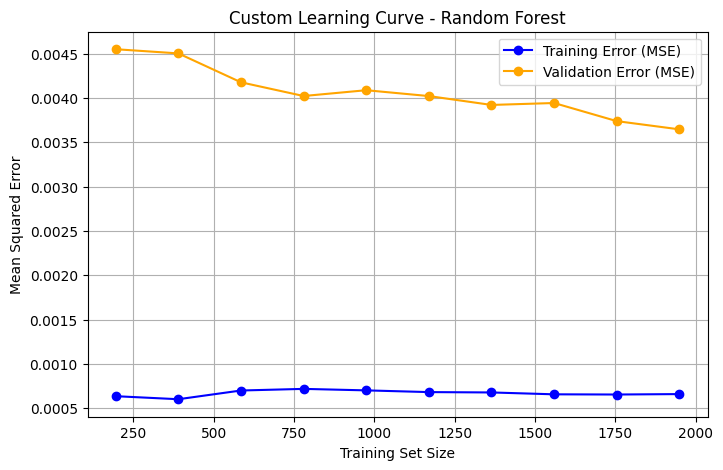

In [37]:
plot_custom_learning_curve(final_model, X, y)
